# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url= "http://api.openweathermap.org/data/2.5/weather?=units=Imperial&APPID=" + weather_api_key

city_data =[]

for city in cities:
    cityurl = url + "&q=" + city 
    print('Processing Record ' + city)
    try:
        city_weather = requests.get(cityurl).json()
        latitute_data = city_weather["coord"]["lat"]
        longitude_data = city_weather["coord"]["lon"]
        temperature_data = city_weather["main"]["temp_max"]
        humidity_data = city_weather["main"]["humidity"]
        cloud_data = city_weather["clouds"]["all"]
        wind_data = city_weather["wind"]["speed"]
        country_data = city_weather["sys"]["country"]
        date_data = city_weather["dt"]

        city_data.append({"City": city,
                          "Lat": latitute_data,
                          "Lng": longitude_data,
                          "Max Temp": temperature_data,
                          "Humidity": humidity_data,
                          "Cloudiness": cloud_data,
                          "Wind Speed": wind_data,
                          "Country": country_data,
                          "Date": date_data})
    except:
        print("City not found")
        pass 

Processing Record acuna
City not found
Processing Record sola
Processing Record leningradskiy
Processing Record hilo
Processing Record okhotsk
Processing Record kruisfontein
Processing Record tuktoyaktuk
Processing Record saskylakh
Processing Record beloha
Processing Record punta arenas
Processing Record bethel
Processing Record baindur
Processing Record nikolskoye
Processing Record ushuaia
Processing Record hithadhoo
Processing Record taolanaro
City not found
Processing Record haines junction
Processing Record marcona
City not found
Processing Record anadyr
Processing Record boromo
Processing Record thompson
Processing Record kapaa
Processing Record rocha
Processing Record holme
Processing Record iqaluit
Processing Record bluff
Processing Record novaya chigla
Processing Record morgan city
Processing Record hasaki
Processing Record mataura
Processing Record nizhneyansk
City not found
Processing Record thinadhoo
Processing Record new norfolk
Processing Record buala
Processing Record lav

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("WeatherPy.csv",index=False, header = True)
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [18]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.88,167.55,305.15,70,75,2.10,VU,1580012827
1,leningradskiy,69.38,178.42,248.40,96,98,1.84,RU,1580012827
2,hilo,19.73,-155.09,298.15,65,90,1.50,US,1580012827
3,okhotsk,59.38,143.30,248.80,72,100,7.12,RU,1580012827
4,kruisfontein,-34.00,24.73,291.32,87,89,10.16,ZA,1580012556


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

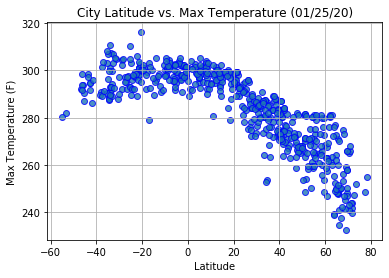

In [19]:
#scatterplot
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude vs Temperature (F).png")
plt.show()

#### Latitude vs. Humidity Plot

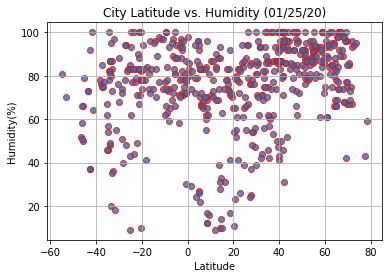

In [20]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

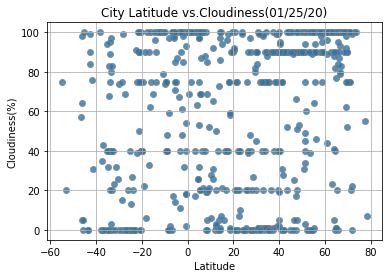

In [21]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="grey", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs.Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude vs.Clouddiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

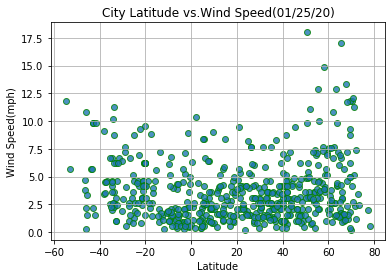

In [22]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="g", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs.Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()